In [4]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner
import omama as O

In [6]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpuan4n8pmGP2
Verbose mode active!


In [7]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Flower_dataset/102Flower_segmentation_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Flower_dataset/102Flower_segmentation_masks.npy')

In [8]:
len(masks)

8189

In [9]:
len(images)

8189

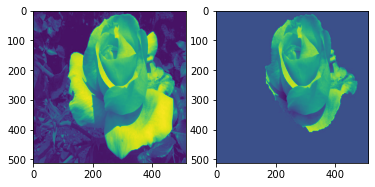

In [10]:
O.DataToNpyFiles.show_image_and_mask(images[222], masks[222])

In [18]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [20]:
#
#
R.setup_data(images, masks, dataset_size=8189, weights=weights)

Weights OK!


In [21]:
RUNS = 5

In [22]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
7/7 [==============================] - 30s 3s/step - loss: -80.5454 - dice_coeff: 1.3017 - val_loss: -327.4344 - val_dice_coeff: 1.7765
Epoch 2/100
7/7 [==============================] - 9s 1s/step - loss: -116.9991 - dice_coeff: 1.3473 - val_loss: -293.6764 - val_dice_coeff: 1.7331
Epoch 3/100
7/7 [==============================] - 9s 1s/step - loss: -133.4571 - dice_coeff: 1.3523 - val_loss: -261.0069 - val_dice_coeff: 1.6876
Epoch 4/100
7/7 [==============================] - 9s 1s/step - loss: -147.5180 - dice_coeff: 1.3605 - val_loss: -244.0643 - val_dice_coeff: 1.6556
Epoch 5/100
7/7 [==============================] - 10s 1s/step - loss: -154.8107 - dice_coeff: 1.3733 - val_loss: -261.3635 - val_dice_coeff: 1.6508
Epoch 6/100
7/7 [==============================] - 10s 1s/step - loss: -162.0642 - dice_coeff: 1.3735 - val_loss: -252.5576 - val_dice_coeff: 1.6281
Epoch 7/100
7/7 [==============================] - 10s 1s/step - loss: -168.0304 - dice_coeff: 1.38

Epoch 56/100
7/7 [==============================] - 9s 1s/step - loss: -231.4365 - dice_coeff: 1.4937 - val_loss: -392.2253 - val_dice_coeff: 1.5953
Epoch 57/100
7/7 [==============================] - 9s 1s/step - loss: -232.3140 - dice_coeff: 1.4938 - val_loss: -355.4995 - val_dice_coeff: 1.5753
Epoch 58/100
7/7 [==============================] - 10s 1s/step - loss: -232.7091 - dice_coeff: 1.4966 - val_loss: -351.0403 - val_dice_coeff: 1.5617
Epoch 59/100
7/7 [==============================] - 9s 1s/step - loss: -231.3409 - dice_coeff: 1.5037 - val_loss: -373.6033 - val_dice_coeff: 1.5500
Epoch 60/100
7/7 [==============================] - 9s 1s/step - loss: -234.5791 - dice_coeff: 1.5002 - val_loss: -348.5414 - val_dice_coeff: 1.5346
Epoch 61/100
7/7 [==============================] - 10s 1s/step - loss: -235.9272 - dice_coeff: 1.4978 - val_loss: -334.8708 - val_dice_coeff: 1.5280
Epoch 62/100
7/7 [==============================] - 9s 1s/step - loss: -236.4253 - dice_coeff: 1.5016 - 

D_ids ['a1f78ead-330d-405c-b9aa-bef800d64370', 'ef26b97c-96bb-48a9-9744-008dd00b5d66', '7aa2c791-d472-4153-9dc7-2f302137144e', '2e4b857c-b003-410c-89f9-ccfd572f2005', '7e790ea0-9d80-4778-bf85-373cb865433b', '2994de73-3a6a-4a44-8a21-a44a20ce9631', 'f136c479-ac67-44b6-8cd4-9c339e1ea55b', '7a04e3dd-f9f7-4778-94e8-98120f6a9b98', 'e59617b5-0bd7-49a9-ab1c-a158a7a27d56', 'ccfc9fab-1036-4fbe-bb4d-f144c5772695', 'bae302c4-3d18-4f1c-a94b-627a68913235', '59bcb9c7-fc11-4dc6-a36b-3154b4ca1f47', '418fd23b-22fa-449d-a993-dd9c7269ecf2', 'c95ce883-dc9f-42d9-9870-80870668962c', 'd0dd53f5-b7c9-4b38-a864-7463e3994623', '261ad2af-e87a-4cc6-919b-e4e950d14898', '63e0618e-d3ad-420a-919e-184a6d2620a2', 'bde87f63-cc5e-483e-a5bf-049cefdaadb2', '046afa70-8c9a-4388-b5a0-1a704006b77b', '23facc3d-90c7-41b6-9f92-72df2c124940', '280b4b59-0712-42ca-a24e-f763c3206b88', '95953d10-aff9-4a21-9cab-7cb46472e6fc', '47d3adca-50ac-4298-8438-71a8b121cb49', '401f7a2b-43fe-407d-b8b0-3c456d29f0c8', '6d5a81e7-550c-4376-9662-bbe058c5

Replacing 85 from 257 !
D_relabeled_ 85
selected_ids ['47d3adca-50ac-4298-8438-71a8b121cb49', 'ec4de33c-c5b7-4c5d-b388-2bb6ee826cef', '891ceabc-f8c1-404c-8718-32d41c15d590', 'e21ee3d7-4ab0-4617-8510-9a3a22f631a4', '2de6592e-df32-4f0d-a7a8-3b8d1be9d178', '80291b3b-d9c2-4b8c-af63-78cf6721178f', 'aa71998f-5cd0-4337-a2cc-a278e6d28a75', '2573ff26-471a-439e-a54f-0e21464882bd', 'f0e4c94c-9d2f-4305-8ae1-bc92e347961c', '03327b0d-98c4-4414-b418-34e3a62e26f3', '05a4e360-5909-42f0-bada-c31338efd5b7', '807ee857-0fe8-4e44-a5ec-adfe4c6beadc', '3e4eb288-3a58-4a5c-9a8e-7839817a6a59', '77b66cb2-9315-41a1-ba22-73946f3efd2c', '2cd2cebe-6648-4ec0-8956-8e58f1164200', '32bce7bd-3e17-4611-8ba0-6f4bc650a6c0', 'bde87f63-cc5e-483e-a5bf-049cefdaadb2', 'd80a1e63-a1da-4e51-8e4d-923d111f5882', 'e59617b5-0bd7-49a9-ab1c-a158a7a27d56', '73493f22-6a72-43c6-bd65-5089e98c2934', '248e0a0a-8afb-4b20-a73e-a9c0e4f1ab12', 'b767d0fa-43b9-4f32-a362-34d1bf765178', '359337d7-70f5-4d7c-a4f4-f9cf31fac583', 'a476688e-0889-48f8-9e9b-0

8/8 [==============================] - 11s 1s/step - loss: -281.2581 - dice_coeff: 1.5431 - val_loss: -371.5419 - val_dice_coeff: 1.5970
Epoch 10/100
8/8 [==============================] - 11s 1s/step - loss: -281.8099 - dice_coeff: 1.5467 - val_loss: -290.8028 - val_dice_coeff: 1.4877
Epoch 11/100
8/8 [==============================] - 11s 1s/step - loss: -282.9302 - dice_coeff: 1.5445 - val_loss: -387.9037 - val_dice_coeff: 1.6045
Epoch 12/100
8/8 [==============================] - 12s 2s/step - loss: -283.9696 - dice_coeff: 1.5466 - val_loss: -317.4046 - val_dice_coeff: 1.5181
Epoch 13/100
8/8 [==============================] - 11s 1s/step - loss: -285.2515 - dice_coeff: 1.5425 - val_loss: -373.0562 - val_dice_coeff: 1.5909
Epoch 14/100
8/8 [==============================] - 11s 1s/step - loss: -285.7148 - dice_coeff: 1.5481 - val_loss: -326.7889 - val_dice_coeff: 1.5442
Epoch 15/100
8/8 [==============================] - 11s 1s/step - loss: -287.2576 - dice_coeff: 1.5471 - val_loss

Epoch 64/100
8/8 [==============================] - 11s 1s/step - loss: -332.9577 - dice_coeff: 1.5878 - val_loss: -416.2691 - val_dice_coeff: 1.6145
Epoch 65/100
8/8 [==============================] - 11s 1s/step - loss: -335.4320 - dice_coeff: 1.5884 - val_loss: -405.5567 - val_dice_coeff: 1.6044
Epoch 66/100
8/8 [==============================] - 10s 1s/step - loss: -336.7289 - dice_coeff: 1.5884 - val_loss: -424.5571 - val_dice_coeff: 1.6190
Epoch 67/100
8/8 [==============================] - 11s 1s/step - loss: -337.6075 - dice_coeff: 1.5891 - val_loss: -416.0983 - val_dice_coeff: 1.6101
Epoch 68/100
8/8 [==============================] - 11s 1s/step - loss: -338.5554 - dice_coeff: 1.5892 - val_loss: -426.9749 - val_dice_coeff: 1.6132
Epoch 69/100
8/8 [==============================] - 10s 1s/step - loss: -339.6711 - dice_coeff: 1.5911 - val_loss: -408.0677 - val_dice_coeff: 1.5968
Epoch 70/100
8/8 [==============================] - 11s 1s/step - loss: -340.2610 - dice_coeff: 1.59

Replacing 81 from 243 !
D_relabeled_ 81
selected_ids ['b857955f-5cf5-4b12-94f1-3346876afb15', 'f8ecd7c4-af86-437b-913c-3cfb5e106d80', '2aab09e1-d3e2-40fb-8cb4-7d105f3cf517', '4b1f6f03-18b7-48d3-a36d-add9f142a029', 'e5ac3ee6-8d20-49a3-a94a-4f725533ed86', 'e674068f-4830-4d2c-903c-b864d56fc6f6', 'fa10800a-34ab-4064-b880-364c80ec765b', '0ffd4cee-175e-466d-9dda-4ae73f9acd67', '5c993d74-381e-4d17-bbcf-231d4a194e87', '8175856b-40e5-48bb-9cf8-4a82c5755a6a', 'd08f6b1e-efee-4d2a-a012-217a60867bf6', 'ea383859-aaec-4b00-873a-7fb7cebfa172', '392f5720-1b30-40c7-b887-6758c940069c', '66b72dcd-12b6-41e2-9163-8b3e5371d92a', '8b1f15f4-19b8-4476-b1ed-ff2749377e48', '468debbf-3651-4bc8-a9e6-8276e3ca5787', 'cd612e1c-7129-4fdb-8c9c-ceb7fd0aa10a', '6d2d2e87-3b36-472c-bd05-887429b4fa72', 'b426a93a-1272-405b-9d10-3f759695e93f', '350bcd9c-0535-4067-b55c-79f0a0db654e', '12da847f-70ea-47fb-8482-ae26980a6dba', '58b780f8-c0c3-4b55-8d45-47c652e2a189', '53e4f84f-cb98-4ab5-b901-3aa5a5f16363', '7fa1ddc1-73f7-41ef-9316-2

9/9 [==============================] - 12s 1s/step - loss: -384.3250 - dice_coeff: 1.6358 - val_loss: -519.4080 - val_dice_coeff: 1.6914
Epoch 12/100
9/9 [==============================] - 12s 1s/step - loss: -385.9813 - dice_coeff: 1.6368 - val_loss: -458.1922 - val_dice_coeff: 1.6639
Epoch 13/100
9/9 [==============================] - 12s 1s/step - loss: -386.8246 - dice_coeff: 1.6384 - val_loss: -532.7092 - val_dice_coeff: 1.7027
Epoch 14/100
9/9 [==============================] - 12s 1s/step - loss: -388.3254 - dice_coeff: 1.6393 - val_loss: -495.4142 - val_dice_coeff: 1.6735
Epoch 15/100
9/9 [==============================] - 12s 1s/step - loss: -389.9631 - dice_coeff: 1.6407 - val_loss: -516.2120 - val_dice_coeff: 1.6854
Epoch 16/100
9/9 [==============================] - 12s 1s/step - loss: -390.3196 - dice_coeff: 1.6405 - val_loss: -483.2857 - val_dice_coeff: 1.6734
Epoch 17/100
9/9 [==============================] - 12s 1s/step - loss: -391.2405 - dice_coeff: 1.6440 - val_loss

Epoch 66/100
9/9 [==============================] - 12s 1s/step - loss: -451.2321 - dice_coeff: 1.7046 - val_loss: -549.8351 - val_dice_coeff: 1.7250
Epoch 67/100
9/9 [==============================] - 12s 1s/step - loss: -451.3153 - dice_coeff: 1.7057 - val_loss: -544.1184 - val_dice_coeff: 1.7357
Epoch 68/100
9/9 [==============================] - 12s 1s/step - loss: -452.6144 - dice_coeff: 1.7060 - val_loss: -527.2073 - val_dice_coeff: 1.7196
Epoch 69/100
9/9 [==============================] - 12s 1s/step - loss: -454.6927 - dice_coeff: 1.7071 - val_loss: -515.8108 - val_dice_coeff: 1.7161
Epoch 70/100
9/9 [==============================] - 12s 1s/step - loss: -456.0827 - dice_coeff: 1.7106 - val_loss: -538.4423 - val_dice_coeff: 1.7266
Epoch 71/100
9/9 [==============================] - 12s 1s/step - loss: -457.0090 - dice_coeff: 1.7111 - val_loss: -546.3847 - val_dice_coeff: 1.7313
Epoch 72/100
9/9 [==============================] - 12s 1s/step - loss: -458.0465 - dice_coeff: 1.71

Replacing 88 from 264 !
D_relabeled_ 88
selected_ids ['31aee390-b6d2-4317-87b4-6edec394016c', '0ac5b6b5-a321-490f-9322-57edf10aadf0', 'a468d34e-a5a2-46cc-8e57-544d92c41595', '6dd2f258-7690-41f3-b551-f4e34ef3e21f', '1aaf522b-2907-43c1-bd85-bee1db232275', '5aa55679-dc98-4e41-86ca-c11fb0a6eba2', '0c255b94-5c43-4d24-8caa-cfffa75149cc', '8a99b60f-01ef-46e3-a664-180abe786d71', '5cff4219-2d7a-41f7-8aa9-6b30075f84c1', '322e2c8b-ecc8-47cf-8077-11c8e345e814', 'e6d06555-b1e0-4326-a9ce-4b297d81edab', 'e04962cb-1bd7-4b36-afa4-091c9aec0073', 'c6bef8d0-a64a-40f5-81ea-ca21f3ab494f', 'b66b88d2-97cf-44bb-a3f9-58e614d912da', '387cbca0-3622-477d-be3a-23505b84cc3d', '966fc831-e70d-46e5-a736-9d5206a36d4d', 'c669b051-6eb1-42b2-83b0-b618c20831eb', '616ca286-622c-4bbd-a23b-b4386d45ff53', '215e706e-d03a-4d5e-be7b-09cb2e48078d', '25bd39d2-8655-4272-a3cc-ba6bbcb82916', '170a56ba-6799-433a-856c-9d9327a1e1a2', 'afd422e9-2652-45ec-add9-41d52edcc988', 'b67d944b-d86e-4a3f-b89c-531f86d5161a', 'b9e6d2bd-15ff-48c5-b329-a

Epoch 8/100
11/11 [==============================] - 13s 1s/step - loss: -513.8565 - dice_coeff: 1.7550 - val_loss: -599.8724 - val_dice_coeff: 1.7848
Epoch 9/100
11/11 [==============================] - 13s 1s/step - loss: -515.7070 - dice_coeff: 1.7579 - val_loss: -589.0386 - val_dice_coeff: 1.7776
Epoch 10/100
11/11 [==============================] - 13s 1s/step - loss: -516.8695 - dice_coeff: 1.7585 - val_loss: -604.9213 - val_dice_coeff: 1.7841
Epoch 11/100
11/11 [==============================] - 13s 1s/step - loss: -519.1210 - dice_coeff: 1.7587 - val_loss: -635.4930 - val_dice_coeff: 1.7876
Epoch 12/100
11/11 [==============================] - 13s 1s/step - loss: -519.2802 - dice_coeff: 1.7598 - val_loss: -540.7694 - val_dice_coeff: 1.7782
Epoch 13/100
11/11 [==============================] - 13s 1s/step - loss: -522.1359 - dice_coeff: 1.7626 - val_loss: -582.9916 - val_dice_coeff: 1.7725
Epoch 14/100
11/11 [==============================] - 13s 1s/step - loss: -523.6971 - dice

Epoch 62/100
11/11 [==============================] - 13s 1s/step - loss: -597.5526 - dice_coeff: 1.8266 - val_loss: -692.7727 - val_dice_coeff: 1.8372
Epoch 63/100
11/11 [==============================] - 13s 1s/step - loss: -598.7880 - dice_coeff: 1.8273 - val_loss: -702.9625 - val_dice_coeff: 1.8484
Epoch 64/100
11/11 [==============================] - 14s 1s/step - loss: -600.6433 - dice_coeff: 1.8301 - val_loss: -675.0896 - val_dice_coeff: 1.8408
Epoch 65/100
11/11 [==============================] - 13s 1s/step - loss: -602.4855 - dice_coeff: 1.8316 - val_loss: -681.3522 - val_dice_coeff: 1.8414
Epoch 66/100
11/11 [==============================] - 13s 1s/step - loss: -603.8637 - dice_coeff: 1.8319 - val_loss: -704.0148 - val_dice_coeff: 1.8425
Epoch 67/100
11/11 [==============================] - 14s 1s/step - loss: -605.6152 - dice_coeff: 1.8305 - val_loss: -694.4106 - val_dice_coeff: 1.8474
Epoch 68/100
11/11 [==============================] - 13s 1s/step - loss: -606.9070 - di

Replacing 79 from 237 !
D_relabeled_ 79
selected_ids ['456900c6-c6dc-4816-bf7c-3b036a10d262', '7a584a57-2e30-4abf-8721-8eb00f61591f', 'aeefa6b1-3f0e-4e33-b7a0-d7690af1b65d', '2d51c985-b2f7-4b06-b818-98777b0be8c4', 'fceb0a9d-9437-4c3f-b89a-932fae31ffa5', '57c324b6-437f-4c88-b480-e8987c6bc284', 'bfc460b5-3980-4dce-ac04-0927c04cdb2c', '16dc77f5-e055-4e98-ab73-3113abfb4d1b', '7df0169e-9b87-44a3-b90f-affe6d70c2e5', '84795058-45cd-4126-9969-b9a33c07c0e9', 'bec6f580-b7a1-444a-9de5-4d71917605ee', '9933cea2-6cbc-4897-b0d9-01bf6658bcb8', 'c7fb7e42-63fd-47f7-a16c-2d3e4ac3bc47', '8efda232-9153-43ec-bd42-f860c58c31d3', '957ec6c2-6253-4e86-964a-b3e547a6909c', 'e08354e6-0b8e-413f-b41c-d5a9291bf40d', 'd8506533-545f-42af-870f-705a4dddac68', '34e93c45-318e-47c7-9358-5c772c31d507', 'fa60a950-d999-4fd9-975d-96f37a565f59', 'c325a6bb-8144-4e0f-b49b-3dcbef3c2ecb', '24a06bea-8f9e-4a53-ac0a-aa1c9c7b7b30', 'bb5842fa-8362-4338-8bd6-ab7ec972aad9', '22bb9fc9-1d81-49c9-a3d2-954c2e657dee', '356a3666-48b1-4144-bac2-0

12/12 [==============================] - 15s 1s/step - loss: -694.4614 - dice_coeff: 1.7758 - val_loss: -740.1774 - val_dice_coeff: 1.7986
Epoch 13/100
12/12 [==============================] - 14s 1s/step - loss: -695.5387 - dice_coeff: 1.7790 - val_loss: -737.3464 - val_dice_coeff: 1.8081
Epoch 14/100
12/12 [==============================] - 15s 1s/step - loss: -697.1106 - dice_coeff: 1.7819 - val_loss: -734.5805 - val_dice_coeff: 1.7879
Epoch 15/100
12/12 [==============================] - 14s 1s/step - loss: -698.9836 - dice_coeff: 1.7807 - val_loss: -752.2730 - val_dice_coeff: 1.8182
Epoch 16/100
12/12 [==============================] - 14s 1s/step - loss: -700.5526 - dice_coeff: 1.7852 - val_loss: -763.3615 - val_dice_coeff: 1.8144
Epoch 17/100
12/12 [==============================] - 14s 1s/step - loss: -702.2797 - dice_coeff: 1.7833 - val_loss: -741.9213 - val_dice_coeff: 1.8076
Epoch 18/100
12/12 [==============================] - 14s 1s/step - loss: -703.6041 - dice_coeff: 1.7

Epoch 66/100
12/12 [==============================] - 14s 1s/step - loss: -780.7609 - dice_coeff: 1.8549 - val_loss: -840.8320 - val_dice_coeff: 1.8810
Epoch 67/100
12/12 [==============================] - 14s 1s/step - loss: -782.1033 - dice_coeff: 1.8544 - val_loss: -832.3825 - val_dice_coeff: 1.8757
Epoch 68/100
12/12 [==============================] - 14s 1s/step - loss: -784.1474 - dice_coeff: 1.8565 - val_loss: -830.3517 - val_dice_coeff: 1.8696
Epoch 69/100
12/12 [==============================] - 14s 1s/step - loss: -786.1287 - dice_coeff: 1.8591 - val_loss: -833.5195 - val_dice_coeff: 1.8789
Epoch 70/100
12/12 [==============================] - 14s 1s/step - loss: -787.3838 - dice_coeff: 1.8610 - val_loss: -841.8378 - val_dice_coeff: 1.8758
Epoch 71/100
12/12 [==============================] - 15s 1s/step - loss: -788.8397 - dice_coeff: 1.8623 - val_loss: -819.4546 - val_dice_coeff: 1.8712
Epoch 72/100
12/12 [==============================] - 14s 1s/step - loss: -790.6060 - di

Replacing 85 from 255 !
D_relabeled_ 85
selected_ids ['9f520d10-a795-4ed1-a78b-240f9d5ab0ee', '6062c368-d644-4dc0-a2f0-a0ead667d512', '30fc8682-a3b5-4bdd-a29d-cdec757fb715', 'f7085e3c-7ebc-459a-a47e-874a660c4edc', '69032ae2-d185-448c-a264-ce5a13f83c81', '680d1ae3-21bd-42dc-9468-93b00564321e', 'b3bf4d22-b62a-4dc7-8e1c-c20776e7f3af', '4c31ed89-ec82-482a-9d20-92fabcb1fb93', '009b55c9-33c5-40dc-9840-c4e88f126412', 'a4cac178-3cf1-458b-af41-6d5d95764e13', '9078865a-460c-47f4-b796-7d945cfe2874', '01fbce50-9404-4b29-b2ba-eacb4510c1fa', 'e6a30dcd-d25a-4316-bf19-a59e7648cfef', 'd670f6a6-e269-48ad-99f8-2aa44cdd07df', '138dfa8a-c333-4fc0-bfc3-a69da2c37ec3', 'dde6f072-a01f-4554-9eb3-30a194850f6e', '8193f384-8be0-4faf-b677-b7c08806233e', '3333a7a5-dba2-4280-8e54-3f26b3e0429f', '583675de-94c7-44a2-b3de-19efe5c29cbc', '07892163-f975-495b-95ba-c92be720892b', 'c18295cf-3a62-4d69-a39a-e70bb031daa0', '20fa890d-8e28-4b6b-b770-4d8813aef333', '71aa116d-a6e6-41c3-b944-143a34631c13', 'b03f64be-9a15-4097-8d4e-8

In [23]:
R.classifier_scores

[[-256.7244873046875, 1.4662525653839111],
 [-453.59710693359375, 1.6487147808074951],
 [-525.7510986328125, 1.7470484972000122],
 [-638.284423828125, 1.7660647630691528],
 [-839.7907104492188, 1.9008558988571167]]

In [24]:
R.discriminator_scores

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]

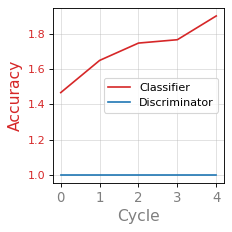

In [25]:
R.plot()